In [1]:
#Installation
#pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../Data_sets/fake_reg.csv')

In [4]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [6]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [7]:
df.shape

(1000, 3)

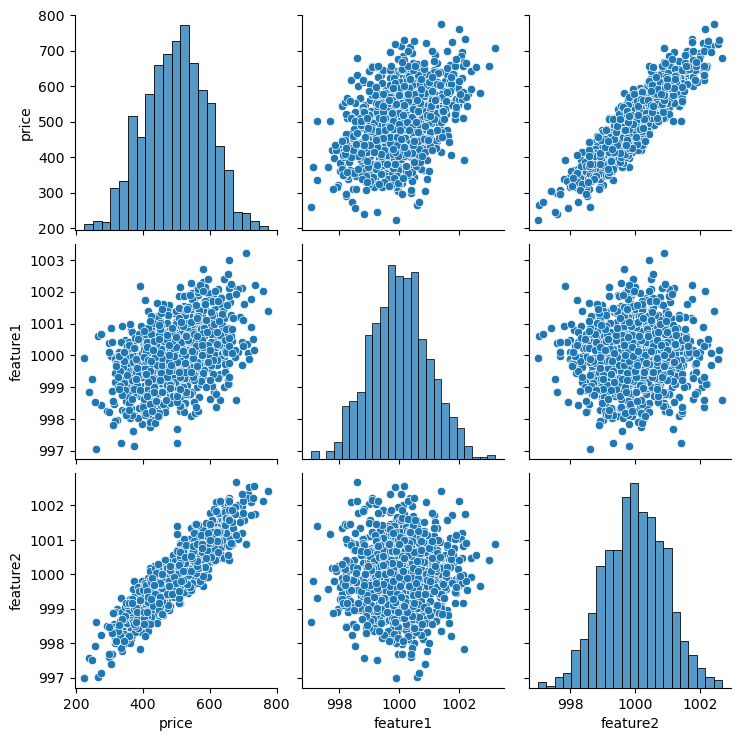

In [8]:
sns.pairplot(data=df)

In [9]:
df.columns

Index(['price', 'feature1', 'feature2'], dtype='object')

we need to convert to numpy array for using the KERAS X : .values and y : .values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df[['feature1','feature2']].values
y = df['price'].values

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 2)
(300, 2)
(700,)
(300,)


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)

MinMaxScaler()

In [17]:
X_train = scaler.transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [19]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

KERAS

In [20]:
#pip install Tensorflow --upgrade

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

In [23]:
model.compile(optimizer='rmsprop',loss='mse')

In [24]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 256293.7031   
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 257008.1250
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 253962.8750
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 258686.8125
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 257450.0625
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 256784.6250
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 257849.0938
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 258953.4219
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 258721.4219
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 254292.6719
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 253525.1094
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 255063.3438
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 253843.2812 
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 762u

In [25]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

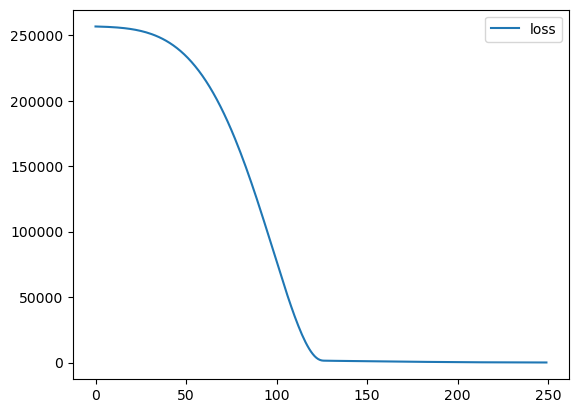

In [26]:
loss_df.plot()

Evaluation

In [27]:
model.evaluate(X_test,y_test,verbose=0)

34.093544006347656

In [28]:
model.evaluate(X_train,y_train,verbose=0)

33.41181182861328

In [29]:
test_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [30]:
test_pred  = pd.Series(test_pred.reshape(300,))

In [31]:
test_pred

0      408.882080
1      620.345886
2      589.534058
3      571.496887
4      373.073578
          ...    
295    529.531128
296    518.098450
297    606.701355
298    419.403351
299    414.930969
Length: 300, dtype: float32

In [32]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [33]:
pred_df = pd.concat([pred_df,test_pred],axis=1)

In [34]:
pred_df

,Test True Y,0
0,402.296319,408.882080
1,624.156198,620.345886
2,582.455066,589.534058
3,578.588606,571.496887
4,371.224104,373.073578
...,...,...
295,525.704657,529.531128
296,502.909473,518.098450
297,612.727910,606.701355
298,417.569725,419.403351


In [35]:
pred_df.columns = ['Test True Y','Model Predictions']

In [36]:
pred_df

,Test True Y,Model Predictions
0,402.296319,408.882080
1,624.156198,620.345886
2,582.455066,589.534058
3,578.588606,571.496887
4,371.224104,373.073578
...,...,...
295,525.704657,529.531128
296,502.909473,518.098450
297,612.727910,606.701355
298,417.569725,419.403351


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

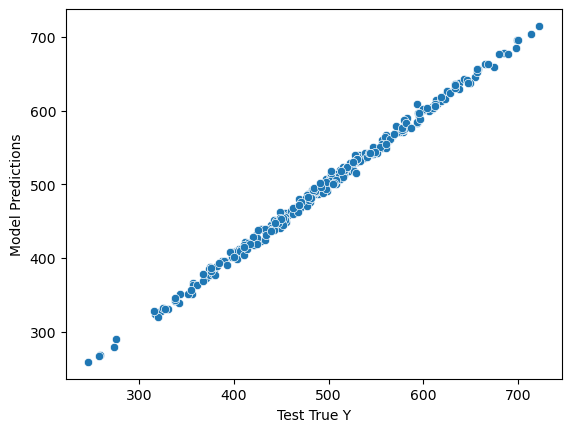

In [37]:
sns.scatterplot(data=pred_df,x='Test True Y',y='Model Predictions')

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [39]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.781084043253957

In [41]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [42]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

34.093549997470376

In [43]:
np.sqrt(mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions']))

5.838968230558407

Predition on a New Data that model has not seen

In [44]:
new_data = [[998,1000]]

In [45]:
new_data = scaler.transform(new_data)

In [46]:
model.predict(new_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[424.37616]], dtype=float32)

Save the Model in your local

In [47]:
from tensorflow.keras.models import load_model

In [54]:
model.save('my_first_model.keras')

In [56]:
later_model = load_model('my_first_model.keras')

In [57]:
later_model.predict(new_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[424.37616]], dtype=float32)